In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense 
from tensorflow.keras.optimizers import SGD, Adam

In [26]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.2

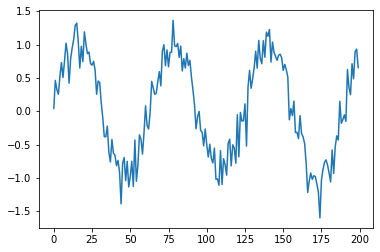

In [27]:
plt.plot(series)

## Build dataset

In [28]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
    

In [29]:
X = np.array(X)
X.shape

(190, 10)

In [30]:
X = X.reshape(-1,T)

In [31]:
X.shape

(190, 10)

In [32]:
Y = np.array(Y)

In [33]:
N = len(X)

In [34]:
N

190

In [35]:
X[0].shape

(10,)

In [44]:
X[0]

array([0.04243575, 0.46235049, 0.32627964, 0.25541739, 0.52386265,
       0.7307417 , 0.50597723, 0.74624019, 1.0211953 , 0.86254081])

In [43]:
Y[0]

0.4211912201106762

## Model 

In [36]:
i = Input(shape=(X[0].shape))
x = Dense(1)(i)



In [37]:
model = Model(i,x)

In [38]:
model.compile(optimizer = Adam(lr=0.1) , loss = 'mse')

In [39]:
r = model.fit(X[:N//2] , Y[:N//2] , epochs = 80 , validation_data=(X[N//2:] , Y[N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 27ms/step - loss: 0.2133 - val_loss: 0.2599
Epoch 2/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1845 - val_loss: 0.1639
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1630 - val_loss: 0.1132
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1157 - val_loss: 0.1037
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0939 - val_loss: 0.0959
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0880 - val_loss: 0.0833
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0720 - val_loss: 0.0788
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0650 - val_loss: 0.0748
Epoch 9/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0608 - val_loss: 0.0709
Epoch 10/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0542 - val_loss: 0.0705
Epoch 11/80
3/3 [============

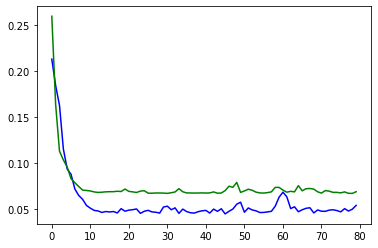

In [42]:
plt.plot(r.history['loss'] , color = 'blue')
plt.plot(r.history['val_loss'] , color = 'green')


## Prediction - The Wrong Way : Single outcome everytime 

In [45]:
val_target = Y[N//2:]
val_forecast = []

i = N//2 
while len(val_forecast) < len(val_target):
    p = model.predict(X[i].reshape(1,-1))[0,0]  # 1x1 array -> scalar
    i+=1
    val_forecast.append(p)

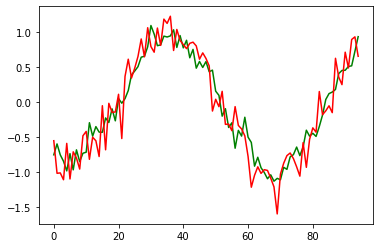

In [46]:
plt.plot(val_forecast , label = 'val_forecast' , color ='green')
plt.plot(val_target , label = 'val_target' , color ='red')

In [49]:
len(val_forecast)

95

## Prediction - The Right Way : Single outcome everytime 

In [50]:
val_target = Y[N//2:]
val_forecast = []

x_last = X[N//2] 
while len(val_forecast) < len(val_target):
    p = model.predict(x_last.reshape(1,-1))[0,0]  # 1x1 array -> scalar  ; get the first prediction
    val_forecast.append(p)  # append to list
    x_last = np.roll(x_last,-1) # shift the list left or get rid of the first element leaving last spot vacant
    x_last[-1] = p # fill the last spot with our prediction 
    
# This way we do not use the training data for prediction and get to see what our model can actually do..

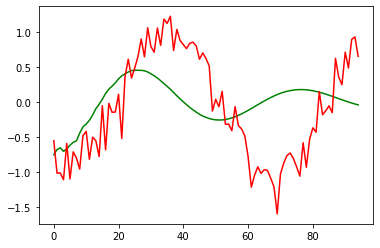

In [51]:
plt.plot(val_forecast , label = 'val_forecast' , color ='green')
plt.plot(val_target , label = 'val_target' , color ='red')